In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("dataset/smart_meter_data.csv", parse_dates=["timestamp"])

In [2]:
df.head()

,timestamp,user_id,energy_usage_kWh,label
0,2025-05-01 00:00:00,user_1,2.25,normal
1,2025-05-01 01:00:00,user_1,0.32,normal
2,2025-05-01 02:00:00,user_1,2.15,normal
3,2025-05-01 03:00:00,user_1,1.15,normal
4,2025-05-01 04:00:00,user_1,1.23,normal


In [3]:
# Feature engineering
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["weekday"] = df["timestamp"].dt.weekday
df["user_id_encoded"] = df["user_id"].astype("category").cat.codes
df["label_encoded"] = df["label"].map({"normal": 0, "theft": 1})

In [4]:
X = df[["energy_usage_kWh", "hour", "day", "weekday", "user_id_encoded"]]
y = df["label_encoded"]

In [5]:
X

,energy_usage_kWh,hour,day,weekday,user_id_encoded
0,2.25,0,1,3,0
1,0.32,1,1,3,0
2,2.15,2,1,3,0
3,1.15,3,1,3,0
4,1.23,4,1,3,0
...,...,...,...,...,...
3595,1.11,19,30,4,4
3596,1.31,20,30,4,4
3597,1.84,21,30,4,4
3598,1.85,22,30,4,4


In [6]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3595    0
3596    0
3597    0
3598    0
3599    0
Name: label_encoded, Length: 3600, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       687
           1       0.61      0.58      0.59        33

    accuracy                           0.96       720
   macro avg       0.80      0.78      0.79       720
weighted avg       0.96      0.96      0.96       720



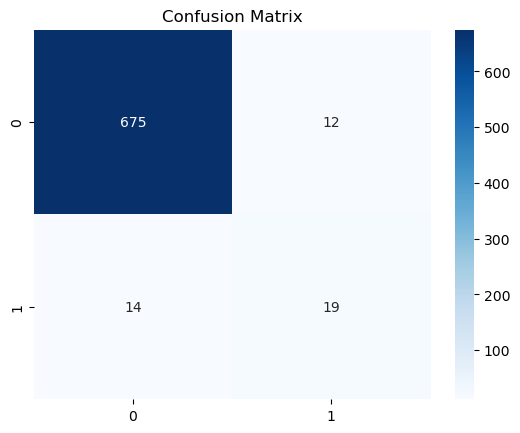

In [10]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()